In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
train=pd.read_csv('/content/drive/MyDrive/projects/playground-series-s3e22/train.csv')
test=pd.read_csv('/content/drive/MyDrive/projects/playground-series-s3e22/test.csv')

In [3]:
#Merge the test train dataset into df
df=pd.concat([train,test],ignore_index=True)

In [4]:
#show the head
df.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
#Show the tail
df.tail(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
2054,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,...,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes,NaN
2055,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,...,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no,NaN
2056,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,...,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no,NaN
2057,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,...,49.0,8.6,clear,5.0,no,3111,0,0,yes,NaN
2058,2058,yes,adult,528461,38.1,66.0,12.0,cold,normal,normal_pink,...,31.5,6.2,None,1.6,yes,2205,0,0,yes,NaN


In [6]:
#show info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2059 non-null   int64  
 1   surgery                2059 non-null   object 
 2   age                    2059 non-null   object 
 3   hospital_number        2059 non-null   int64  
 4   rectal_temp            2059 non-null   float64
 5   pulse                  2059 non-null   float64
 6   respiratory_rate       2059 non-null   float64
 7   temp_of_extremities    2059 non-null   object 
 8   peripheral_pulse       2059 non-null   object 
 9   mucous_membrane        2059 non-null   object 
 10  capillary_refill_time  2059 non-null   object 
 11  pain                   2059 non-null   object 
 12  peristalsis            2059 non-null   object 
 13  abdominal_distention   2059 non-null   object 
 14  nasogastric_tube       2059 non-null   object 
 15  naso

In [7]:
#chechking null values in dataset
df.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph      0
rectal_exam_feces          0
abdomen                    0
packed_cell_volume         0
total_protein              0
abdomo_appearance          0
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                  824
dtype: int64

In [8]:
#Dropping Na values
df.dropna()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [9]:
#Drop na values in outcome column
df.dropna(how="all",subset=["outcome"])

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [10]:
#Convert outcome dataset into int64 type
df['outcome'] = df['outcome'].isna().astype(int)

In [11]:
#Checking Null values
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [12]:
#Putting all object type data into colnames
colnames=df.select_dtypes(["object"]).columns
colnames

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data'],
      dtype='object')

In [13]:
#Transform all object type data into int64
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()
df[colnames]=le.fit_transform(df[colnames])

In [14]:
#Select input and output from given dataset
X=df.drop('outcome',axis=1)#input
Y=df['outcome'] #Output

In [15]:
#spliting all data into 70 and 30
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
X_train.shape ,X_test.shape

((1441, 28), (618, 28))

In [17]:
#Apply RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
#Create object of RandomOverSampler class
ros=RandomOverSampler()
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [18]:
Y_train1.value_counts()

0    865
1    865
Name: outcome, dtype: int64

In [19]:
Y_test1.value_counts()

0    370
1    370
Name: outcome, dtype: int64

In [20]:
#Apply StandardScaler on Input X_train, X_test
from sklearn.preprocessing import StandardScaler
#create object of standardscaler
ss=StandardScaler()
X_train1=ss.fit_transform(X_train1)
X_test1=ss.transform(X_test1)

In [21]:
import tensorflow as tf
#create a neural network
from tensorflow.keras.layers import Dropout
#create object of Sequential class
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30,activation='relu',
                          input_shape=(X.shape[1],)),Dropout(0.20),#1st hidden layer
    tf.keras.layers.Dense(units=29,activation='relu'),Dropout(0.20),#2nd hidden layer
    tf.keras.layers.Dense(units=28,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=27,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=26,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=25,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=24,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=23,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=22,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=21,activation='relu'),Dropout(0.20),
    tf.keras.layers.Dense(units=1,activation='sigmoid')#output Layer
])

In [22]:
#to show summery of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                870       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 29)                899       
                                                                 
 dropout_1 (Dropout)         (None, 29)                0         
                                                                 
 dense_2 (Dense)             (None, 28)                840       
                                                                 
 dropout_2 (Dropout)         (None, 28)                0         
                                                                 
 dense_3 (Dense)             (None, 27)                7

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Create a EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#create object of EarlyStopping class
es=EarlyStopping(monitor='val_loss',#val_loss means testing loss
min_delta=0.0001, #value of lambda
patience=20,
verbose=1,
mode='auto',
baseline=None,
restore_best_weights=False,
)

In [25]:
#Train the model with 70% data and also check validation
trained_model=model.fit(X_train1,Y_train1,epochs=10000,callbacks=es,
                        batch_size=32,validation_data=(X_test1,Y_test1))

Epoch 1/10000
55/55 [==============================] - 4s 13ms/step - loss: 0.6935 - accuracy: 0.4954 - val_loss: 0.7793 - val_accuracy: 0.5716
Epoch 2/10000
55/55 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5208 - val_loss: 0.8365 - val_accuracy: 0.7743
Epoch 3/10000
55/55 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.6023 - val_loss: 1.1896 - val_accuracy: 0.8541
Epoch 4/10000
55/55 [==============================] - 0s 5ms/step - loss: 0.5765 - accuracy: 0.7740 - val_loss: 1.7538 - val_accuracy: 0.9135
Epoch 5/10000
55/55 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8590 - val_loss: 3.4279 - val_accuracy: 0.9257
Epoch 6/10000
55/55 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8792 - val_loss: 2.5180 - val_accuracy: 0.9446
Epoch 7/10000
55/55 [==============================] - 0s 4ms/step - loss: 0.2312 - accuracy: 0.9133 - val_loss: 3.1502 - val_accuracy: 0.941

In [26]:
#Evaluation of training data
model.evaluate(X_train1,Y_train1)

55/55 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.9919


[0.018970593810081482, 0.99190753698349]

In [27]:
#Evaluation of testing data
model.evaluate(X_test1,Y_test1)

24/24 [==============================] - 0s 4ms/step - loss: 5.6486 - accuracy: 0.9649


[5.648566246032715, 0.9648648500442505]

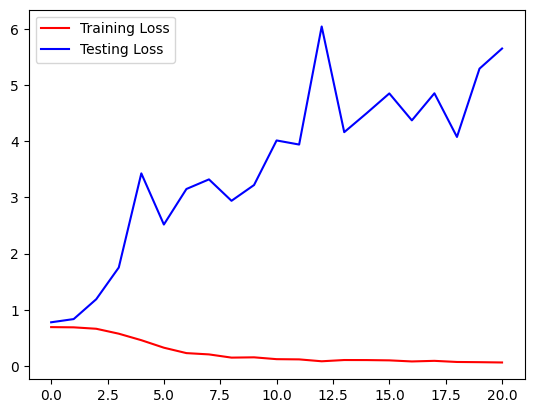

In [28]:
#visualisaton training loss and testing loss(val_loss)
plt.plot(trained_model.history['loss'],color='red',label='Training Loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='Testing Loss')
plt.legend()
plt.show()

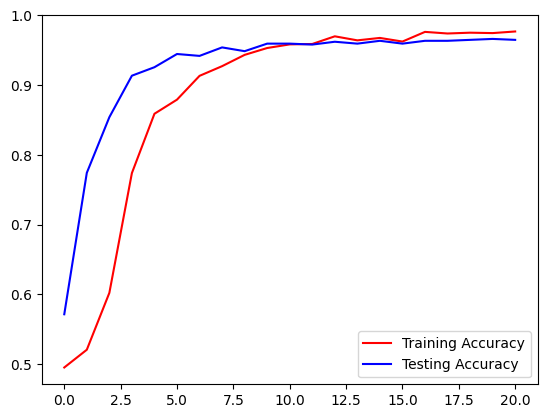

In [29]:
plt.plot(trained_model.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],color='blue',label='Testing Accuracy')
plt.legend()
plt.show()

In [30]:
Y_pred=model.predict(X_test1)

24/24 [==============================] - 0s 3ms/step


In [31]:
Y_pred

array([[4.46964474e-03],
       [9.99999642e-01],
       [1.56141690e-03],
       [7.78354879e-04],
       [1.12597365e-03],
       [1.76997285e-03],
       [1.00000000e+00],
       [9.70097780e-01],
       [3.11143021e-03],
       [1.04649295e-03],
       [7.80067872e-04],
       [1.16290548e-03],
       [9.55228461e-04],
       [3.90408823e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.25250871e-04],
       [9.99999881e-01],
       [1.00000000e+00],
       [8.07966630e-04],
       [9.80194926e-01],
       [1.36963453e-03],
       [1.04908727e-03],
       [9.99981999e-01],
       [1.32796599e-03],
       [6.10722171e-04],
       [2.87978956e-03],
       [1.27964816e-03],
       [9.99972284e-01],
       [1.24497910e-03],
       [1.28923624e-03],
       [9.99997556e-01],
       [1.01786992e-03],
       [9.92226298e-04],
       [1.17854238e-03],
       [1.01460866e-03],
       [1.00000000e+00],
       [1.27511367e-03],
       [2.22157151e-03],
       [1.00000000e+00],


In [32]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [33]:
#Generate Report
from sklearn.metrics import classification_report
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       370
           1       0.94      0.99      0.97       370

    accuracy                           0.96       740
   macro avg       0.97      0.96      0.96       740
weighted avg       0.97      0.96      0.96       740



In [34]:
#confusion metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test1,Y_pred))

[[348  22]
 [  4 366]]
